In [8]:
from Bio import Phylo
from io import StringIO
from Bio.Blast import NCBIXML
from Bio import SeqIO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from Bio import Align
from Bio.Align import substitution_matrices
from collections import Counter
import logomaker


In [12]:
#Pasos previos (en WSL, script aparte)
def flowchart_WSL():
    print("Pasos previos:")
    print("START → Bajar secuencias de Hemoglobinas humanas Uniprot")
    print("→ Crear base de datos (makeblastdb) (WSL)")
    print("→ Ejecutar BLASTP (blastp) (WSL) → Guardar XML→ END")

# Flujo principal del programa resumido (en esta notebook)
def flowchart():
    print("Flujo principal del programa resumido presentado aqui: ")
    print("START → Parsear resultados alineamiento BLAST (XML) (Biopython)")
    print("→ Construir matrices [Bit Score, Identidad %, E-value]")
    print("→ Verificar simetría de matrices")
    print("→ Calcular correlaciones entre matrices")
    print("→ Graficar correlaciones (scatter + tendencia)")
    print("→ Graficar matriz de identidad (%)")
    print("→ Calcular matriz de distancia: 1 - identidad → Graficar")
    print("→ Ejecutar UPGMA paso a paso (agrupamientos sucesivos)")
    print("→ Construir árbol guía (formato Newick)")
    print("→ Dibujar árbol guía con ramas proporcionales")
    print("→ Alineamiento múltiple a partir del árbol guía → Guardar (archivo ALN)")
    print("→ Graficar conservación por posición en el alineamiento")
    print("→ Graficar sequence logo (logomaker)")
    print("END")
# Llamar a la función
flowchart_WSL()
flowchart()

Pasos previos:
START → Bajar secuencias de Hemoglobinas humanas Uniprot
→ Crear base de datos (makeblastdb) (WSL)
→ Ejecutar BLASTP (blastp) (WSL) → Guardar XML→ END
Flujo principal del programa resumido presentado aqui: 
START → Parsear resultados alineamiento BLAST (XML) (Biopython)
→ Construir matrices [Bit Score, Identidad %, E-value]
→ Verificar simetría de matrices
→ Calcular correlaciones entre matrices
→ Graficar correlaciones (scatter + tendencia)
→ Graficar matriz de identidad (%)
→ Calcular matriz de distancia: 1 - identidad → Graficar
→ Ejecutar UPGMA paso a paso (agrupamientos sucesivos)
→ Construir árbol guía (formato Newick)
→ Dibujar árbol guía con ramas proporcionales
→ Alineamiento múltiple a partir del árbol guía → Guardar (archivo ALN)
→ Graficar conservación por posición en el alineamiento
→ Graficar sequence logo (logomaker)
END


¿La matriz Bit Score es simétrica?: True
¿La matriz Identidad es simétrica?: True
¿La matriz E-value es simétrica?: True
Correlación Bit Score vs Identidad: 0.9920
Correlación Bit Score vs E-value: -0.2316
Correlación Identidad vs E-value: -0.2143


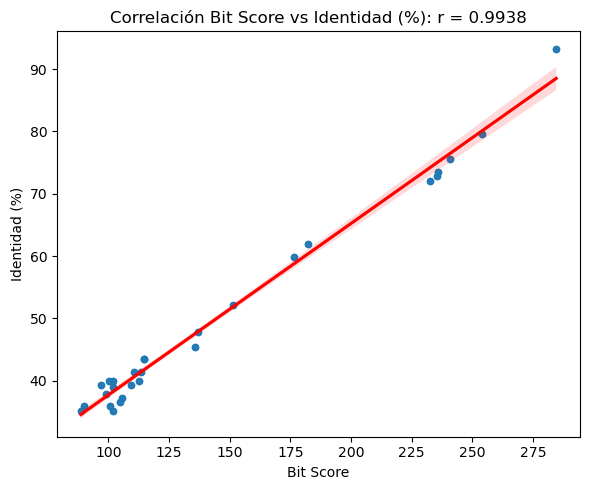

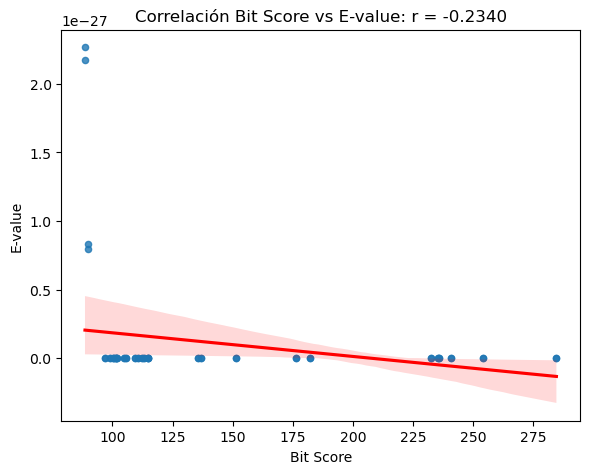

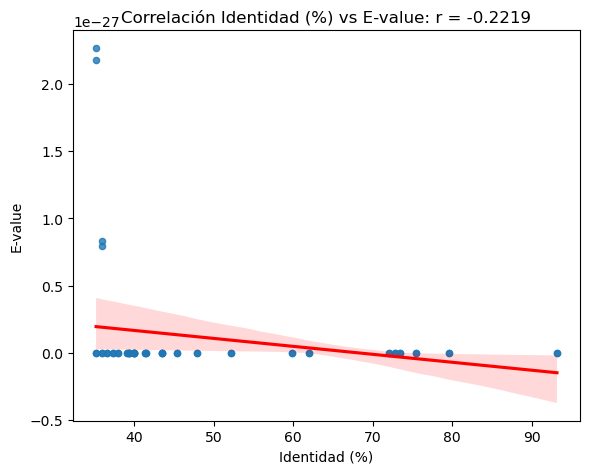

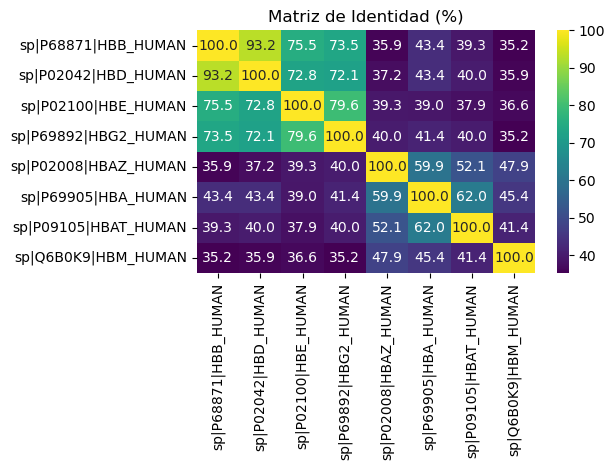

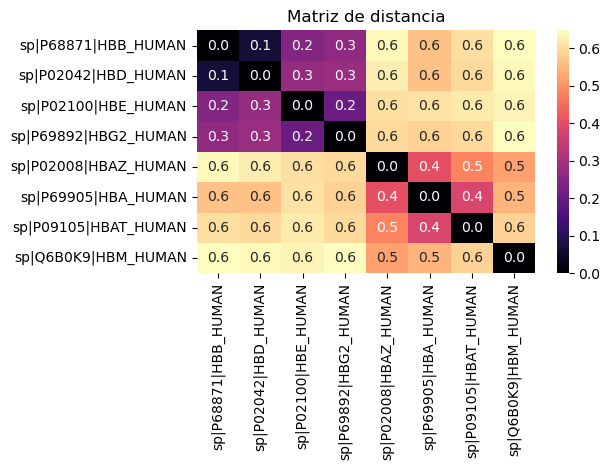

                      sp|P68871|HBB_HUMAN  sp|P02042|HBD_HUMAN  \
sp|P68871|HBB_HUMAN              0.000000             0.068027   
sp|P02042|HBD_HUMAN              0.068027             0.000000   
sp|P02100|HBE_HUMAN              0.244898             0.272109   
sp|P69892|HBG2_HUMAN             0.265306             0.278912   
sp|P02008|HBAZ_HUMAN             0.641379             0.627586   
sp|P69905|HBA_HUMAN              0.565517             0.565517   
sp|P09105|HBAT_HUMAN             0.606897             0.600000   
sp|Q6B0K9|HBM_HUMAN              0.648276             0.641379   

                      sp|P02100|HBE_HUMAN  sp|P69892|HBG2_HUMAN  \
sp|P68871|HBB_HUMAN              0.244898              0.265306   
sp|P02042|HBD_HUMAN              0.272109              0.278912   
sp|P02100|HBE_HUMAN              0.000000              0.204082   
sp|P69892|HBG2_HUMAN             0.204082              0.000000   
sp|P02008|HBAZ_HUMAN             0.606897              0.600000   
sp|

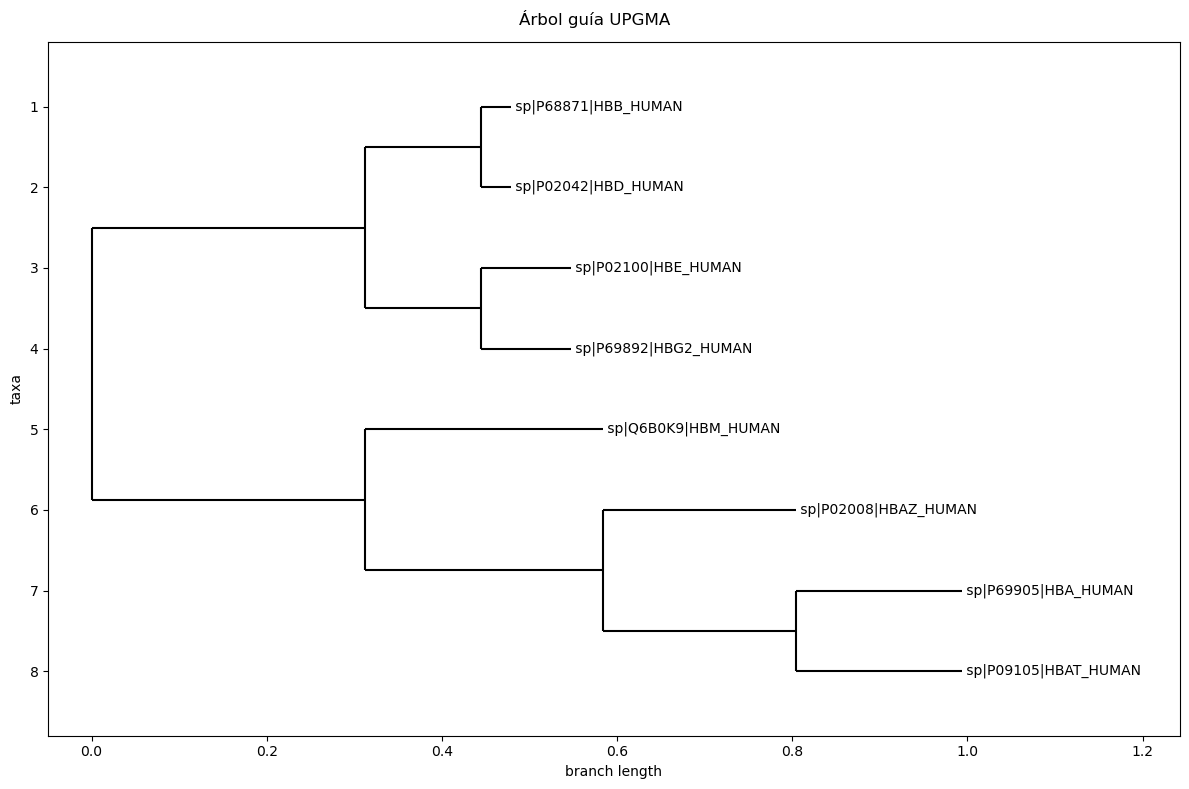

c:\Users\Usuario\anaconda3\envs\bioinformatica\Lib\site-packages\Bio\Align\__init__.py:1277: BiopythonDeprecationWarning: alignment.format has been deprecated, and we intend to remove it in a future release of Biopython. Instead of alignment.format(), please use format(alignment) or an f-string.
  warnings.warn(



ALINEAMIENTO MÚLTIPLE:
sp|P68871|HBB_HUMAN: MVHLTPEEKSAVTALWGKV--NVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH
sp|P02042|HBD_HUMAN: MVHLTPEEKTAVNALWGKV--NVDAVGGEALGRLLVVYPWTQRFFESFGDLSSPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFSQLSELHCDKLHVDPENFRLLGNVLVCVLARNFGKEFTPQMQAAYQKVVAGVANALAHKYH
sp|P02100|HBE_HUMAN: MVHFTAEEKAAVTSLWSKM--NVEEAGGEALGRLLVVYPWTQRFFDSFGNLSSPSAILGNPKVKAHGKKVLTSFGDAIKNMDNLKPAFAKLSELHCDKLHVDPENFKLLGNVMVIILATHFGKEFTPEVQAAWQKLVSAVAIALAHKYH
sp|P69892|HBG2_HUMAN: MGHFTEEDKATITSLWGKV--NVEDAGGETLGRLLVVYPWTQRFFDSFGNLSSASAIMGNPKVKAHGKKVLTSLGDAIKHLDDLKGTFAQLSELHCDKLHVDPENFKLLGNVLVTVLAIHFGKEFTPEVQASWQKMVTGVASALSSRYH
sp|P02008|HBAZ_HUMAN: M--LSAQERAQIAQVWDLIAGHEAQFGAELLLRLFTVYPSTKVYFPHL-SACQ-----DATQLLSHGQRMLAAVGAAVQHVDNLRAALSPLADLHALVLRVDPANFPLLIQCFHVVLASHLQDEFTVQMQAAWDKFLTGVAVVLTEKYR
sp|P69905|HBA_HUMAN: M-SLTKTERTIIVSMWAKISTQADTIGTETLERLFLSHPQTKTYFPHF-DLHP-----GSAQLRAHGSKVVAAVGDAVKSIDDIGGALSKLSELHAYI

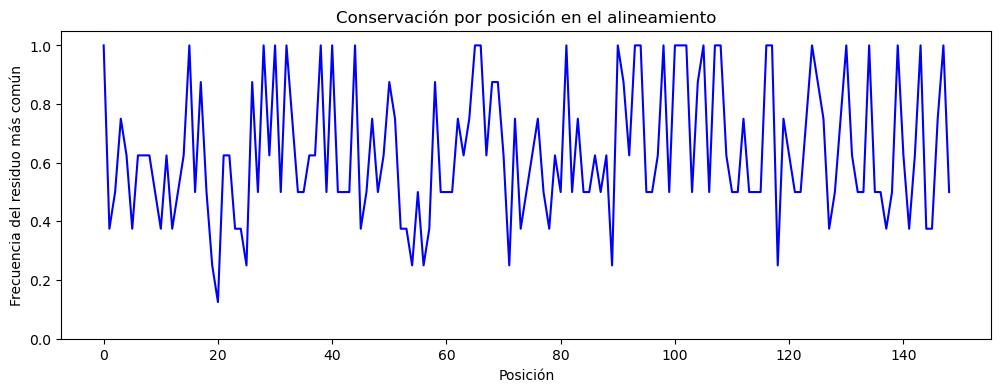


Generando sequence logo...


<Figure size 1500x500 with 0 Axes>

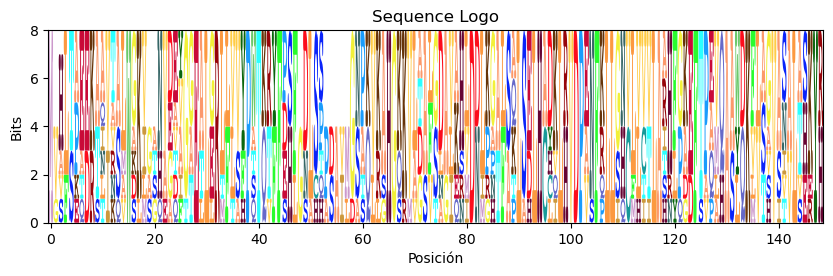

In [11]:

# ----Bloque 1: Parseo del archivo XML obtenido de BLAST----
def parse_blast_xml(xml_file, bit_matrix, identity_matrix, evalue_matrix):
    """Parsea un archivo XML de BLAST y rellena las matrices correspondientes."""
    with open(xml_file) as handle:
        blast_records = list(NCBIXML.parse(handle))

#Se rellenan las matrices inicializadas con los valores del BLAST
    for record in blast_records: #Se recorre cada alineamiento BLAST (record) que corresponde a una secuencia "query".
        query_id = record.query.split()[0]
        for align in record.alignments: #Luego se recorre cada secuencia "hit" alineada contra ella.
            if not align.hsps: #para evitar errores si no hay HSPs
                continue
            hit_id = align.hit_def.split()[0]
            hsp = align.hsps[0] #Se toma solo el primer HSP (align.hsps[0]), que suele ser el mejor alineamiento
            bit_matrix.loc[query_id, hit_id] = hsp.bits
            identity_matrix.loc[query_id, hit_id] = (hsp.identities / hsp.align_length) * 100
            evalue_matrix.loc[query_id, hit_id] = hsp.expect


# ----Bloque 2: Análisis de matrices y visualización----
# ---Bloque 2A: Chequeo de simetría de las matrices---
def check_symmetry(matrix, name):
    """Verifica si una matriz es simétrica (si mat[i][j] == mat[j][i])
    """
    is_sym = np.allclose(matrix.values, matrix.values.T, atol=1e-5) #Usa np.allclose con tolerancia (atol) de 1e-5, porque pueden existir pequeñas diferencias numéricas.
    print(f"¿La matriz {name} es simétrica?: {is_sym}")
    return is_sym

# Bloque 2B: Correlaciones entre matrices y visualización
def correlation(m1, m2, label1, label2):
    """Calcula la correlación de Pearson entre dos matrices."""
    flat1 = m1.values.flatten() #convierte cada matriz en un vector
    flat2 = m2.values.flatten()
    corr = np.corrcoef(flat1, flat2)[0, 1] #calcula la matriz de correlación 2x2; se extrae el valor [0,1]
    print(f"Correlación {label1} vs {label2}: {corr:.4f}")

def viz_correlation(m1, m2, label1, label2):
    """Grafica las correlaciones calculadas y aplica una máscara para evitar graficar autocomparaciones."""
    mask = ~np.eye(m1.shape[0], dtype=bool) #Se genera una mascara para evitar autocomparaciones (diagonal principal)
    flat1 = m1.values[mask]
    flat2 = m2.values[mask]

    corr = np.corrcoef(flat1, flat2)[0, 1]

# Crea gráfico de dispersión con línea de tendencia
    plt.figure(figsize=(6, 5))
    sns.regplot(x=flat1, y=flat2, scatter_kws={'s': 20}, line_kws={'color': 'red'})
    plt.xlabel(label1)
    plt.ylabel(label2)
    plt.title(f"Correlación {label1} vs {label2}: r = {corr:.4f}")
    plt.tight_layout()
    plt.show()

# Visualización de matriz de identidad (%)
def viz_identity_matrix(identity_matrix):
    sns.heatmap(identity_matrix, cmap="viridis", annot=True, fmt=".1f")
    plt.title("Matriz de Identidad (%)")
    plt.tight_layout()
    plt.show()

# Visualización de matriz de distancia
def viz_dist_matrix(distance_df):
    sns.heatmap(distance_df, cmap="magma", annot=True, fmt=".1f")
    plt.title("Matriz de distancia")
    plt.tight_layout()
    plt.show()

#----Bloque 3: Árbol guía----
#---Bloque 3A: Pasos de agrupamiento para el árbol guía---
def upgma_step(df):
    """Realiza un paso de agrupamiento UPGMA y devuelve el nuevo DataFrame."""
    # Buscar el par más cercano
    min_dist = np.inf
    pair = None
    for i in df.index:
        for j in df.columns:
            if i != j and df.loc[i, j] < min_dist:
                min_dist = df.loc[i, j]
                pair = (i, j)
    a, b = pair
    print(f"Agrupando: {a} y {b} con distancia {min_dist:.3f}")

    # Crear nuevo nodo con distancias (formato Newick)
    new_node = f"({a}:{min_dist/2:.3f},{b}:{min_dist/2:.3f})"

    # Calcular nuevas distancias promediadas
    new_row = {}
    for label in df.index:
        if label not in pair:
            dist = (df.loc[a, label] + df.loc[b, label]) / 2
            new_row[label] = dist
    new_row[new_node] = 0.0

    # Eliminar las filas/columnas de a y b
    df = df.drop(index=[a, b], columns=[a, b])

    # Si no quedan columnas, devolvemos el nodo final
    if df.shape[0] == 0:
        return pd.DataFrame(index=[new_node], columns=[new_node])

    # Agregar la nueva fila y columna
    df.loc[new_node] = pd.Series(new_row)
    df[new_node] = df.loc[new_node]
    return df

#---Bloque 3B: Construcción del árbol guía---
def build_upgma_tree(df):
    """Construye un árbol guía con UPGMA a partir de un DataFrame de distancias."""
    step = 1
    while len(df) > 2:
        print(f"\n Paso {step}")
        df = upgma_step(df)
        print(df.round(3))
        step += 1
    # Paso final: unir los dos últimos nodos
    a, b = df.index[0], df.index[1]
    dist = df.loc[a, b]
    final_tree = f"({a}:{dist/2:.3f},{b}:{dist/2:.3f});"
    return final_tree

#---Bloque 3C: Visualización del árbol guía---
def draw_tree(newick_str, figsize=(10, 6), title="Árbol guía"):
    """
    Visualiza un árbol guía a partir de un string Newick.
    """
    if not newick_str.strip().endswith(";"): # Asegurar que termine en punto y coma
        newick_str += ";"
    tree = Phylo.read(StringIO(newick_str), "newick") # Leer el árbol desde el string newick
    fig, ax = plt.subplots(figsize=figsize) # Crear figura y eje
    fig.suptitle(title)
    # Dibujar el árbol en el eje especificado
    Phylo.draw(tree, axes=ax, do_show=False)
    plt.tight_layout()
    plt.show()

# ----Bloque 4: Alineamiento múltiple----
#---Bloque 4A: Alineamiento de a pares---
def align_pairs(seq1, seq2):
    """Alinea dos secuencias y devuelve las secuencias alineadas."""
    aligner = Align.PairwiseAligner()

    #Cargar matriz de sustitución BLOSUM64
    matrix = substitution_matrices.load("BLOSUM62")
    aligner.substitution_matrix = matrix

    #Establecer penalizaciones por gaps
    aligner.open_gap_score = -10 #penalización alta para abrir un gap
    aligner.extend_gap_score = -0.5 #penalización baja por extender gap ya existente

    #obtener el mejor alineamiento del iterador
    try:
        best_aln = next(aligner.align(seq1,seq2)) #el método .align() devuelve un iterador. Se obtiene primer y mejor resultado con next()
    except StopIteration:
        return "","" #en el caso de que no se encuentre un alineamiento
    formatted_aligment = best_aln.format() #metodo .format() convierte el alineamiento en un str
    lines = formatted_aligment.strip().split("\n") #se divide el str en lineas y se extraen las secuencias
    aligned_seqA = lines[0] #la primera linea es la primer secuencia
    aligned_seqB = lines[2] #la tercera linea es la segunda secuencia
    return aligned_seqA, aligned_seqB

def expand_gaps(profile, aligned_seq):
    """Expande los gaps del alineamiento a todas las secuencias del perfil"""
    aligned_profile = []

    for seq in profile:
        new_seq = ""
        i = 0  # índice en la secuencia original

        for char in aligned_seq:
            if char == "-":
                new_seq += "-"
            else:
                if i < len(seq):
                    new_seq += seq[i]
                    i += 1
                else:
                    new_seq += "-"  # evitar IndexError si nos pasamos
        aligned_profile.append(new_seq)
    return aligned_profile

#---Bloque 4B: Secuencia consenso---
def build_consensus(profile):
    """Genera la secuencia consenso de un perfil de secuencias alineadas."""
    consensus = ""
    aln_len = len(profile[0])
    for i in range(aln_len):
        column = [seq[i] for seq in profile]
        counts = Counter(column)
        if "-" in counts:
            del counts["-"]  # ignorar gaps en el consenso
        if counts:
            consensus += counts.most_common(1)[0][0]
        else:
            consensus += "-"
    return consensus

#---Bloque 4C: Alinea recursivamente---
def align_recursive(clado, sequences):
    """Alinea recursivamente las hojas del árbol guía."""
    if clado.is_terminal():
        return [sequences[clado.name]]

    perfil_izq = align_recursive(clado.clades[0], sequences)
    perfil_der = align_recursive(clado.clades[1], sequences)

    # Generar consensos
    cons_izq = build_consensus(perfil_izq)
    cons_der = build_consensus(perfil_der)

    # Alinear ambas
    a1, a2 = align_pairs(cons_izq, cons_der)

    # Expandir gaps en los perfiles individuales
    aligned_izq = expand_gaps(perfil_izq, a1)
    aligned_der = expand_gaps(perfil_der, a2)
    return aligned_izq + aligned_der

#---Bloque 4D: Lectura de secuencias---
def read_seq(fasta_file):
    """Lee las secuencias del archivo FASTA y devuelve lista de IDs y diccionario id-secuencia"""
    ids = []
    seqs = {}
    for record in SeqIO.parse(fasta_file, "fasta"):
        ids.append(record.id)
        seqs[record.id] = str(record.seq)
    return ids, seqs

#---Bloque 4E: Alineamiento múltiple y visualización---
def multiple_aling(fasta_file, newick_str):
    """Genera el alineamiento múltiple y lo muestra con índices únicos."""
    seq_ids, sequences = read_seq(fasta_file)
    tree = Phylo.read(StringIO(newick_str), "newick")
    msa = align_recursive(tree.root, sequences)

    # Remover duplicados (si quedó alguno)
    final_msa = []
    seen = set()
    for seq in msa:
        if seq not in seen:
            final_msa.append(seq)
            seen.add(seq)

    print("\nALINEAMIENTO MÚLTIPLE:")
    for i, aligned in enumerate(final_msa):
        print(f"{seq_ids[i]}: {aligned}")

    print("\nPOSICIONES DEL ALINEAMIENTO (con índice por columna):")
    for pos in range(len(final_msa[0])):
        columna = [seq[pos] for seq in final_msa]
        print(f"Pos {pos+1:>3}: {' '.join(columna)}")
    return final_msa, seq_ids

#guardar alineamiento multiple
def save_as_clustal(msa, ids, filename="my_alignment.aln"):
    """
    Guarda un alineamiento múltiple en formato Clustal para visualización.
    """
    with open(filename, "w") as f:
        f.write("CLUSTAL W (1.83) multiple sequence alignment\n\n")
        seq_len = len(msa[0])
        block_size = 60  # columnas por bloque

        for start in range(0, seq_len, block_size):
            end = min(start + block_size, seq_len)
            for seq_id, seq in zip(ids, msa):
                f.write(f"{seq_id:<15} {seq[start:end]}\n")
            f.write("\n")

# ----Bloque 5: Secuencia consenso y conservación por posición----
def consensus_sequence(msa):
    """
    Genera la secuencia consenso a partir de un alineamiento múltiple (lista de secuencias alineadas).
    """
    consenso = ""
    for col in zip(*msa):  # recorre por columnas
        freq = Counter(col)
        if "-" in freq:  # ignorar gaps
            del freq["-"]
        if freq:
            consenso += freq.most_common(1)[0][0]
        else:
            consenso += "-"
    return consenso

# Conservación por posición
def plot_conservation(msa):
    """
    Calcula y grafica la frecuencia del residuo más común en cada columna del alineamiento.
    """
    conservation_scores = []
    for col in zip(*msa):
        freq = Counter(col)
        if "-" in freq:
            del freq["-"]
        if freq:
            max_freq = freq.most_common(1)[0][1] / len(col)
            conservation_scores.append(max_freq)
        else:
            conservation_scores.append(0)

    plt.figure(figsize=(12,4))
    plt.plot(conservation_scores, color="blue")
    plt.title("Conservación por posición en el alineamiento")
    plt.xlabel("Posición")
    plt.ylabel("Frecuencia del residuo más común")
    plt.ylim(0, 1.05)
    plt.show()

#Sequence logo
def sequence_logo(msa):
    """
    Genera un sequence logo a partir de un alineamiento múltiple.
    """
    # Convertir MSA en matriz de frecuencias por posición
    counts_matrix = []
    for col in zip(*msa):  # recorrer por columnas
        freqs = Counter(col)
        if "-" in freqs:
            del freqs["-"]  # ignorar gaps
        counts_matrix.append(freqs)

    # Transformar en DataFrame para logomaker
    df = pd.DataFrame(counts_matrix).fillna(0)

    # Crear el logo
    plt.figure(figsize=(15,5))
    logomaker.Logo(df, color_scheme= "skylign_protein", font_name="Courier New", font_weight ="bold")
    plt.title("Sequence Logo")
    plt.xlabel("Posición")
    plt.ylabel("Bits")
    plt.show()

#----Bloque 6: Programa principal----
def run():
    #Archivo fasta con N=8 secuencias de hemoglobina humana bajadas de Uniprot
    fasta_file = "hemoglobinas.fasta"
    #Alineamiento BLAST que se hizo en WSL con BLAST+ local (script aparte)
    blast_output = "blast_result.xml"

    # Lectura de IDs
    records = list(SeqIO.parse(fasta_file, "fasta"))
    ids = [rec.id for rec in records]
    n = len(ids)

    # Inicialización de matrices
    bit_matrix = pd.DataFrame(np.zeros((n, n)), index=ids, columns=ids) #matriz que almacena los puntajes bit score.
    identity_matrix = pd.DataFrame(np.zeros((n, n)), index=ids, columns=ids) #matriz que almacena el porcentaje de identidad.
    evalue_matrix = pd.DataFrame(np.ones((n, n)), index=ids, columns=ids) #matriz que almacena los e-values.
    #evalue_matrix se rellena inicialmente con unos en lugar de ceros ya que los E-values suelen ser mucho menores a 1; evitando que se confundan ceros con significancia

    #Llamada bloque 1
    parse_blast_xml(blast_output, bit_matrix, identity_matrix, evalue_matrix)

    #Llamada bloque 2
    check_symmetry(bit_matrix, "Bit Score")
    check_symmetry(identity_matrix, "Identidad")
    check_symmetry(evalue_matrix, "E-value")

    #Llamada bloque 2B
    correlation(bit_matrix, identity_matrix, "Bit Score", "Identidad")
    correlation(bit_matrix, evalue_matrix, "Bit Score", "E-value")
    correlation(identity_matrix, evalue_matrix, "Identidad", "E-value")

    # Llamadas para graficar correlaciones
    viz_correlation(bit_matrix, identity_matrix, "Bit Score", "Identidad (%)")
    viz_correlation(bit_matrix, evalue_matrix, "Bit Score", "E-value")
    viz_correlation(identity_matrix, evalue_matrix, "Identidad (%)", "E-value")

    #Llamada para graficar matriz de identidad
    viz_identity_matrix(identity_matrix)

    #Llamada para graficar matriz de distancia
    distance_df = 1 - (identity_matrix / 100)
    distance_matrix = distance_df.to_numpy()
    labels = distance_df.index.to_list()
    viz_dist_matrix(distance_df)
    #Imprime matriz de distancia y etiquetas simplificadas (dataframe)
    df = pd.DataFrame(distance_matrix, index=ids, columns=ids)
    print(df)

    #Llamada bloque 3
    newick_str = build_upgma_tree(df)
    print("\n Árbol final en formato Newick:")
    print(newick_str)
    draw_tree(newick_str, figsize=(12, 8), title="Árbol guía UPGMA")

    #Llamada bloque 4
    final_msa, seq_ids = multiple_aling(fasta_file, newick_str)

    # Guardar alineamiento en formato Clustal
    save_as_clustal(final_msa, seq_ids, "mi_alineamiento.aln")
    print("Archivo mi_alineamiento.aln se ha guardado correctamente.")

    #Llamada bloque 5
    consenso = consensus_sequence(final_msa)
    print("\nSecuencia consenso:")
    print(consenso)

    print("\nGraficando conservación por posición...")
    plot_conservation(final_msa)

    print("\nGenerando sequence logo...")
    sequence_logo(final_msa)


if __name__ == '__main__':
    run()


### CONCLUSIONES
1) SIMETRÍA

Las matrices resultaron simétricas en todos los casos. Esto sugiere que:
- El alineamiento se realizó correctamente
- No hay problemas de formato ni truncamientos.
- Las secuencias son suficientemente similares como para que BLAST recupere simetría (como en este ejemplo que son proteínas pertenecientes a la misma familia: hemoglobinas humanas).

2) CORRELACIONES

- Correlación Bit Score vs Identidad: 0.9920 **Muy alta correlación positiva.**
Cuando dos secuencias poseen un mayor número de aminoacidos idénticos compartidos, esto se traduce en un mayor % de identidad; también se obtiene un bit score más alto.
Más identidad → mejor alineamiento → mayor bit score.
El bit score y el porcentaje de identidad están prácticamente dando la misma información en este dataset.

- Correlación Bit Score vs E-value: -0.2316
- Correlación Identidad vs E-value: -0.2143
**Correlaciones negativas débiles.**
Cuando el bit score o la identidad aumentan, el E-value tiende a disminuir, pero no de forma fuerte ni consistente.
Hay mucha variabilidad en los E-values para distintos alineamientos.
Los E-values pueden ser sensibles a la longitud de las secuencias, a la composición y a la base de datos usada.
También son logarítmicos por lo que cambios pequeños en bit score o identidad no siempre se reflejan linealmente en el E-value.


3) ÁRBOL GUÍA

Representa la historia evolutiva de las hemoglobinas humanas

El árbol agrupa las secuencias en dos grandes grupos o clusters: las alfa-globinas (HBA y HBZ) y las beta-globinas (HBB, HBD, HBG, HBE). Dentro del cluster de las beta-globinas la hemoglobina beta (HBB) y la hemoglobina delta (HBD) están más cercanas y tienen en común que se tratan de hemoglobinas del adulto, mientras que las globinas fetales (HBG) y embrionarias (HBE) también muestran su propio patrón de cercanía. Esto se correlaciona directamente con el momento en el que se expresan los genes que originan estas proteínas durante el desarrollo humano.

4) IDENTIFICACIÓN DE SITIOS CONSERVADOS

Se obervan ciertos residuos con una conservación del 100%. Estos sitios invariables corresponden a regiones críticas para la función de estas proteínas por ej:
- El bolsillo de unión del grupo hemo, afinidad por el O2
- Estructura del "Globin Fold"
- Contactos entre subunidades

Por otra parte que se hayan encontrado zonas que pueden variar en los residuos de aa indica:
- Regiones menos críticas para la función
- Adaptaciones específicas
- entre otras
